Import Neccessary modules and dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
#Import CSV DATA file
df = pd.read_csv('../data-sets/housing.csv')
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
#Get the object value and replace them with a float or int value
print(df['ocean_proximity'].value_counts())
df['ocean_proximity'] = df['ocean_proximity'].map({
    '<1H OCEAN': 1,
    'INLAND' : 2,
    'NEAR OCEAN' : 3,
    'NEAR BAY': 4,
    'ISLAND': 4
})


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


In [4]:
#Check for the correlation between the data provided in the datasets
df = df.dropna()
print(df.corr().to_string())
#Negative value means when one increases other value decreases
#Positive value means when one increases other value increases as well
#Zero means that there is no effect of that data to another data

                    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
longitude            1.000000 -0.924616           -0.109357     0.045480        0.069608    0.100270    0.056513      -0.015550           -0.045398        -0.440211
latitude            -0.924616  1.000000            0.011899    -0.036667       -0.066983   -0.108997   -0.071774      -0.079626           -0.144638         0.391390
housing_median_age  -0.109357  0.011899            1.000000    -0.360628       -0.320451   -0.295787   -0.302768      -0.118278            0.106432         0.145294
total_rooms          0.045480 -0.036667           -0.360628     1.000000        0.930380    0.857281    0.918992       0.197882            0.133294        -0.016065
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380        1.000000    0.877747    0.979728      -0.007723            0.049686        -0.021411
population

In [5]:
#Split data into x and y
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

threshold = y.mean()
y_binary = (y >= threshold).astype(int)

In [6]:
#SCale the values for better predictions since there is no effect of scaling in this data we won't use it
# scale = StandardScaler()
# X = scale.fit_transform(X)

In [7]:
#Split Data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16346, 9) (4087, 9) (16346,) (4087,)


In [8]:
#Initialize model
model = LogisticRegression(max_iter=3000)
# model = LinearRegression()

#Train the model
model.fit(x_train, y_train)

#Get the value of coefficient and intercept [Weights or bias]

print(f'Weights: {model.coef_}')
print(f'Bias : {model.intercept_}')

Weights: [[-1.87119002e+00 -1.83197340e+00  3.41377116e-02 -7.64990957e-05
   2.25221806e-03 -1.63349969e-03  3.15736399e-03  1.17345032e+00
  -1.94143654e-01]]
Bias : [-164.6360754]


In [9]:
#Test the model and check the r2Score and mean_squared_error
y_pred = model.predict(x_test)

r2Score = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
meanSquaredError = mean_squared_error(y_test, y_pred)
meanAbsoluteError = mean_absolute_error(y_test, y_pred)
print(f'R2Score : {r2Score}')
print(f'mean Squared Error : {meanSquaredError}')
print(f'Mean Absolute Error : {meanAbsoluteError}')
print(f'Accuracy Score: {accuracy}')

R2Score : 0.37432753979182964
mean Squared Error : 0.1509664790800098
Mean Absolute Error : 0.1509664790800098
Accuracy Score: 0.8490335209199902


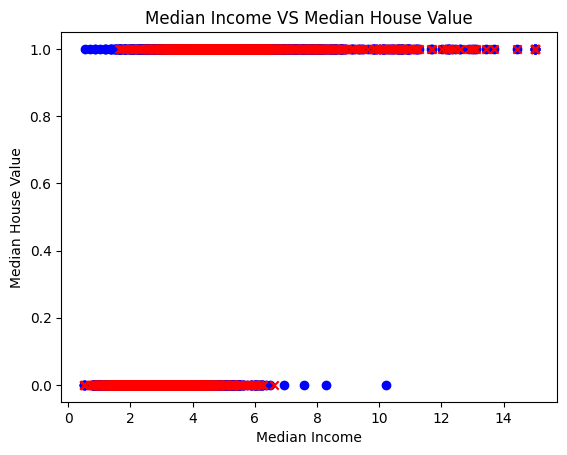

In [10]:
#Plot the data
plt.title('Median Income VS Median House Value')
plt.scatter(x_test['median_income'], y_test, marker="o", color="b")
plt.scatter(x_test['median_income'], y_pred, marker='x', color="r")
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()